# Clustering

## Machine Learning II

Moisés Alfonso Guerrero Jiménez

In [2]:
# Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

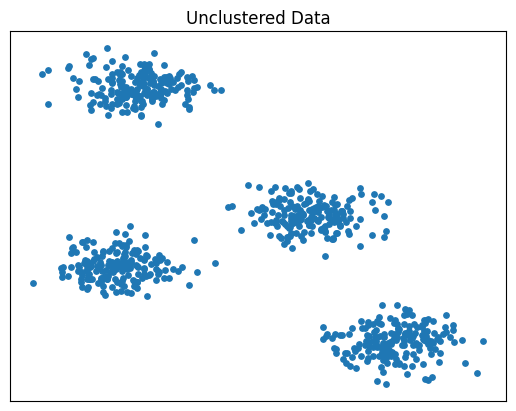

In [44]:
# Specifying the number of cluster our data should have
n_components = 4

X, true_labels = make_blobs(
    n_samples=750, centers=n_components, cluster_std=0.4, random_state=0
)

plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
n_clusters = 4
n_samples, n_features = X.shape
idx = np.random.choice(n_samples, n_clusters, replace=False)
centroids = X[idx]
centroids

array([[0.34309472, 4.54793908],
       [0.90000868, 4.14584752],
       [1.98124605, 0.57460426],
       [1.34900943, 4.43977332]])

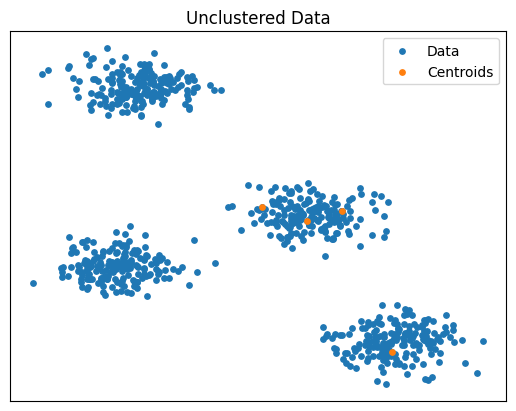

In [47]:
plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.scatter(centroids[:, 0], centroids[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.legend(['Data', 'Centroids'])
plt.show()

In [55]:
i = 0
distances = np.zeros((X.shape[0], n_clusters))
for i, centroid in enumerate(centroids):
    distances[:, i] = np.linalg.norm(X - centroid, axis=1)
distances

array([[5.07303376, 2.81595526, 0.76188847, 3.02440561],
       [2.64782955, 0.37813059, 3.02263708, 0.94599778],
       [2.75233095, 3.25377925, 4.61752425, 3.89262005],
       ...,
       [1.88705051, 0.76903807, 4.15170491, 0.76372193],
       [2.23777625, 2.32452495, 4.01846415, 2.96746751],
       [1.72570377, 0.68803098, 4.01893295, 0.99282421]])

In [56]:
labels = np.argmin(distances, axis=1)

In [57]:
new_centroids = np.zeros((n_clusters, n_features))
new_centroids

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [58]:
for j in range(n_clusters):
    new_centroids[j] = np.mean(X[labels == j], axis=0)

new_centroids

array([[-1.40714949,  5.89792348],
       [ 0.03750294,  3.61205223],
       [ 2.01975098,  0.8451525 ],
       [ 1.18717761,  4.5287853 ]])

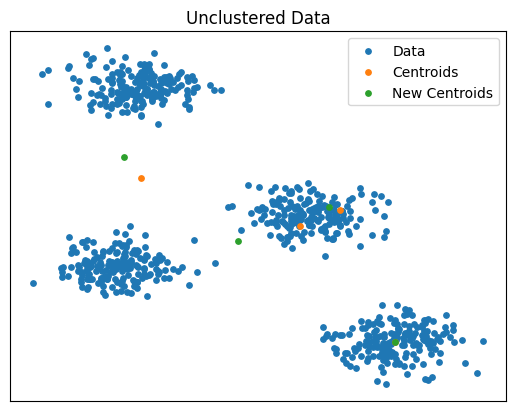

In [59]:
plt.title("Unclustered Data")
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.scatter(centroids[:, 0], centroids[:, 1], s=15)
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], s=15)
plt.xticks([])
plt.yticks([])
plt.legend(['Data', 'Centroids', 'New Centroids'])
plt.show()

In [60]:
if np.sum(np.abs(new_centroids - centroids)) < 1e-15:
    print("Break!")

In [61]:
centroids = new_centroids